# Exercise 1: Identify 5 features and 5 data visualization

In [20]:
import pandas as panda
from matplotlib import pyplot as plt
plt.close('all')

# load data set
dataframe = panda.read_csv("ruter_data.csv", delimiter=';')
dataframe.head()

In [21]:
dataframe = panda.read_csv("Ruter_data.csv", delimiter=';')

In [22]:
# Data Points with 6000 records and 17 Columns
dataframe.shape

(6000, 17)

In [23]:
#write the first 5 line of data
dataframe.head(3)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6


In [24]:
# A quick analyzes for the number of trips per the municipality -> top is "Lillestrøm"
dataframe.Kommune.describe()

count           6000
unique            34
top       Lillestrøm
freq            1094
Name: Kommune, dtype: object

In [25]:
# A quick analyzes for the number of trips per Dato -> top is "18/08/2020"
dataframe.Dato.describe()

count           6000
unique            90
top       18/08/2020
freq             112
Name: Dato, dtype: object

In [26]:
# A quick analyzes for the number of trips per Dato -> top is the buss nr.100
dataframe.Linjenavn.describe()

count     6000
unique     150
top        100
freq       465
Name: Linjenavn, dtype: object

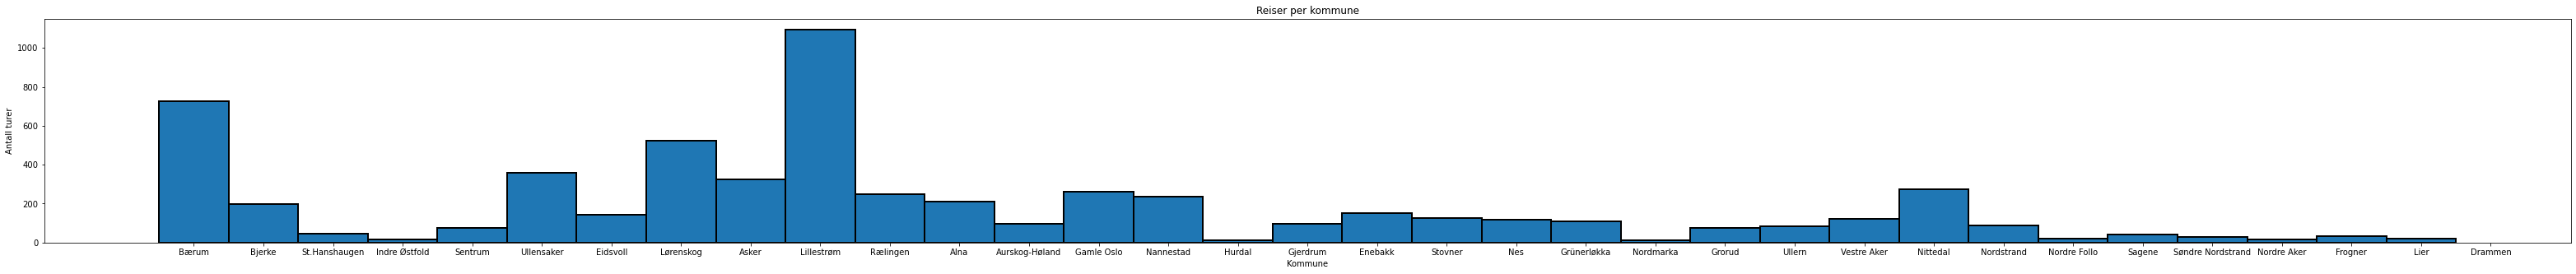

In [27]:
#A trip is a journey from one stop to the next stop
#Feature: Show the number of trips per municipality in the period in the log file
fig = plt.figure(figsize=(55,5))
ax = fig.add_subplot(111)
plt.hist(dataframe.Kommune, bins=33, rwidth=40, align='left', edgecolor='black', linewidth=2)
plt.xlabel('Kommune')
plt.ylabel('Antall turer')
plt.title('Reiser per kommune')
plt.show()

In [113]:
#Data Cleaning.
Ruter = panda.read_csv("Ruter_data.csv", delimiter=';', parse_dates = ["Dato","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"])
#Ruter.head()
r1 = Ruter[Ruter.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra != ":"]
r2 = r1[r1.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra != ":"]
r3 = r2[r2.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra != ":"]
ruter = r3[r3.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra != ":"]
#routes with all valid date and time?
ruter.shape